<a href="https://colab.research.google.com/github/Mahrokh-Eb/Machine-Learning-With-Python/blob/master/1_1_1_numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!pip3 install bcolz 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/numpy/cifar-10-batches-py

/content/drive/MyDrive/numpy/cifar-10-batches-py


In [4]:
import numpy as np

In [5]:
!python --version

Python 3.7.12


In [6]:
print(np.__version__)

1.19.5


In [7]:
#dir(np)

In [8]:
#help(np.where)

In [9]:
#np.where?

In [10]:
x = np.array([[1,2,3], [4,5,6], [7,8,9]])

In [11]:
print(x)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [12]:
print(np.where(x>5, x, 0))

[[0 0 0]
 [0 0 6]
 [7 8 9]]


In [13]:
print(np.array([1,2,3]))

[1 2 3]


In [14]:
print(type)

<class 'type'>


In [15]:
print(type(x))

<class 'numpy.ndarray'>


In [16]:
A = np.array([[1,2,3], [4,5,6]])

In [17]:
print(A)

[[1 2 3]
 [4 5 6]]


In [18]:
print(type(A))

<class 'numpy.ndarray'>


In [19]:
print(A.shape)

(2, 3)


In [20]:
print(x.shape)

(3, 3)


In [21]:
print(x.shape[0])

3


In [22]:
 print(np.reshape(A, (3,2)))

[[1 2]
 [3 4]
 [5 6]]


## **Reshape a matrix from column to row vector**

In [23]:
print(np.reshape(A,(1, -1)))

[[1 2 3 4 5 6]]


In [24]:
print(np.reshape(A, (-1, 1)))

[[1]
 [2]
 [3]
 [4]
 [5]
 [6]]


In [25]:
 print(x)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


# Reshape to two-dimenssion

In [26]:
y = np.array([1,2,3])

In [27]:
print(y[ None, :])

[[1 2 3]]


In [28]:
print(y[:, None])

[[1]
 [2]
 [3]]


In [29]:
print(y[:, np.newaxis])

[[1]
 [2]
 [3]]


# Array dimenssion

In [30]:
print(x.ndim)

2


In [31]:
print(y.ndim)

1


# Data type

In [32]:
print(x.dtype)

int64


In [33]:
c= np.array([1,2,3], dtype=np.float32)

In [34]:
print(c)

[1. 2. 3.]


In [35]:
print(np.arange(1, 20, step=2))

[ 1  3  5  7  9 11 13 15 17 19]


In [36]:
#np.arange?

In [37]:
print(np.linspace(1,2, num=5))

[1.   1.25 1.5  1.75 2.  ]


In [38]:
print(np.logspace(2, 5, 10, base=2))

[ 4.          5.0396842   6.34960421  8.         10.0793684  12.69920842
 16.         20.1587368  25.39841683 32.        ]


In [39]:
np.set_printoptions(formatter={'all':lambda x: '%d' %x})

In [40]:
print(np.logspace(2, 5, 10, base=2))

[4 5 6 8 10 12 16 20 25 32]


# Creating specific arrays

In [41]:
print(np.zeros(shape=(2,3), dtype=np.int32))

[[0 0 0]
 [0 0 0]]


In [42]:
print(5 * np.ones(shape=(2,3)))

[[5 5 5]
 [5 5 5]]


In [43]:
print(np.reshape(np.arange(1, 10), (3,3)))

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [44]:
print(np.fliplr(np.eye(4,4)))

[[0 0 0 1]
 [0 0 1 0]
 [0 1 0 0]
 [1 0 0 0]]


# Create random arrays

In [45]:
print(np.random.randn(3,3))

[[0 -1 0]
 [0 0 0]
 [0 -1 0]]


In [46]:
%matplotlib inline
import matplotlib.pyplot as plt

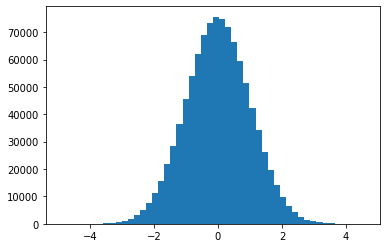

In [47]:
 x = np.random.randn(1000000)
 plt.hist(x, bins=50);

In [48]:
print(np.count_nonzero(np.random.randint(6, size=(2, 4))))

6


In [49]:
#help(np.abs)

In [50]:
x = np.array([1,2,3])
print(x)

[1 2 3]


In [51]:
print(x.shape)

(3,)


In [52]:
y = np.array([[1,2,3], [4,5,6]])
print(y)

[[1 2 3]
 [4 5 6]]


In [53]:
print(np.reshape(y, (1, -1)))

[[1 2 3 4 5 6]]


In [54]:
print(x.size)

3


In [55]:
import keras
import os

In [56]:
import os
import pickle

def load_cifar10_batch(filename):
    """ Load a single batch from CIFAR10 """
    with open(filename, 'rb') as f:
        datadict = pickle.load(f, encoding='bytes')
        X = datadict[b'data']
        Y = datadict[b'labels']
        X = X.reshape(10000, 3, 32, 32).transpose(0, 2, 3, 1).astype('float')
        Y = np.array(Y)
        return X, Y
    
def load_cifar10(dir):
    """ Load all batches of CIFAR10 """
    # load train batch file
    xs = []
    ys = []
    
    for i in range(1, 6):
        filename = os.path.join(dir, 'data_batch_%d' % i)
        X, Y = load_cifar10_batch(filename)
        xs.append(X)
        ys.append(Y)
        
    Xtr = np.concatenate(xs)
    Ytr = np.concatenate(ys)
    del X, Y
    
    # load test batch
    Xte, Yte = load_cifar10_batch(os.path.join(dir, 'test_batch'))
    return Xtr, Ytr, Xte, Yte

In [57]:
X_train, y_train, X_test, y_test = load_cifar10('/content/drive/MyDrive/numpy/cifar-10-batches-py')

In [58]:
print(X_train.shape)
print(y_train.shape)

(50000, 32, 32, 3)
(50000,)


In [59]:
print(y_train[:10])

[6 9 9 4 1 1 2 7 8 3]


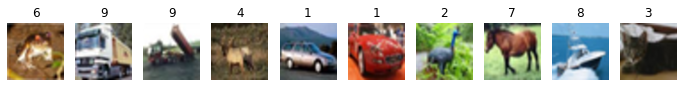

In [60]:
plt.figure(figsize=(12, 2))

for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(X_train[i].astype('uint8'), interpolation='spline16')
    plt.title('%d' % y_train[i])
    plt.axis('off')

In [61]:
print(X_test.shape)
print(y_test.shape)

(10000, 32, 32, 3)
(10000,)


# Visualize data

In [62]:
 class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'track'] 

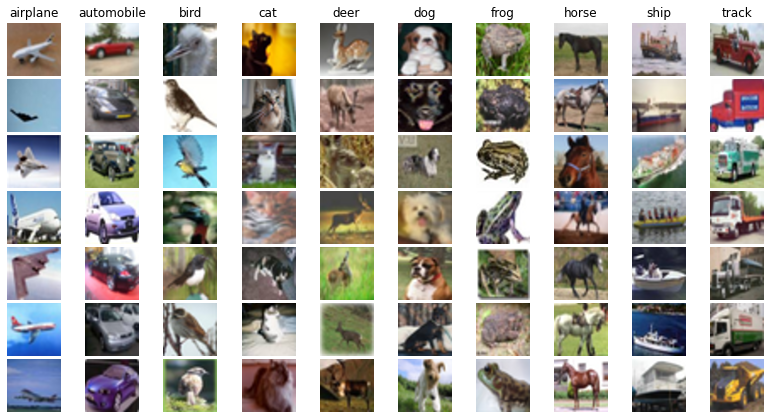

In [63]:

plt.figure(figsize=(12, 6))
plt.subplots_adjust(0, 0, 0.9, 0.9, wspace=0.05, hspace=0.05)
samples_per_class = 7
num_classes = len(class_names)
for c, class_name in enumerate(class_names):
    idxes = np.flatnonzero(y_train == c)
    samples_idxes = np.random.choice(idxes, samples_per_class, replace=False)
    for i, idx in enumerate(samples_idxes):
        plt_idx = i * num_classes + c + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype(np.uint8), interpolation='spline16')
        plt.axis('off')
        if i == 0:
            plt.title(class_names[c])